# Residual Attention Network

### Helpful Links
- https://arxiv.org/pdf/1704.06904.pdf
- https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
- https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33
- https://towardsdatascience.com/review-residual-attention-network-attention-aware-features-image-classification-7ae44c4f4b8
- https://sebastianwallkoetter.wordpress.com/2018/04/08/layered-layers-residual-blocks-in-the-sequential-keras-api/
- https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
- https://medium.com/deepreview/review-of-identity-mappings-in-deep-residual-networks-ad6533452f33
- https://arxiv.org/pdf/1512.03385.pdf
- https://www.d2l.ai/chapter_convolutional-modern/resnet.html
- https://towardsdatascience.com/understanding-residual-networks-9add4b664b03
- https://arxiv.org/pdf/1603.05027.pdf

In [1]:
import sys
sys.path.append("..")

from Code.ResidualAttentionNetwork import ResidualAttentionNetwork

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

import h5py

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

Using TensorFlow backend.


# Network Metadata 

In [3]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

batch_size=32

epochs = 100

# Image Generators

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=.3
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory="./dogs-vs-cats/train/", 
    shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='binary',
    color_mode='grayscale',
    batch_size=batch_size,
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    directory="./dogs-vs-cats/train/", 
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="binary",
    color_mode='grayscale',
    shuffle=True,
    subset='validation'
)

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [6]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [9]:
model = ResidualAttentionNetwork((IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), 1, activation='sigmoid').build_model()

model.compile(optimizer=optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN, verbose=1,
                    validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)

Epoch 1/100
546/546 [==============================] - 113s 208ms/step - loss: 0.7891 - acc: 0.5154 - val_loss: 0.6862 - val_acc: 0.5596
Epoch 2/100
546/546 [==============================] - 79s 145ms/step - loss: 0.6904 - acc: 0.5376 - val_loss: 0.6639 - val_acc: 0.6091
Epoch 3/100
546/546 [==============================] - 81s 148ms/step - loss: 0.6785 - acc: 0.5723 - val_loss: 0.6516 - val_acc: 0.6108
Epoch 4/100
546/546 [==============================] - 81s 149ms/step - loss: 0.6617 - acc: 0.5977 - val_loss: 0.6291 - val_acc: 0.6470
Epoch 5/100
546/546 [==============================] - 79s 145ms/step - loss: 0.6555 - acc: 0.6016 - val_loss: 0.6265 - val_acc: 0.6408
Epoch 6/100
546/546 [==============================] - 81s 148ms/step - loss: 0.6432 - acc: 0.6253 - val_loss: 0.6144 - val_acc: 0.6500
Epoch 7/100
546/546 [==============================] - 80s 147ms/step - loss: 0.6333 - acc: 0.6389 - val_loss: 0.6032 - val_acc: 0.6719
Epoch 8/100
546/546 [==========================

Epoch 61/100
546/546 [==============================] - 80s 147ms/step - loss: 0.3650 - acc: 0.8352 - val_loss: 0.4367 - val_acc: 0.8184
Epoch 62/100
546/546 [==============================] - 80s 146ms/step - loss: 0.3581 - acc: 0.8363 - val_loss: 0.4131 - val_acc: 0.8101
Epoch 63/100
546/546 [==============================] - 80s 146ms/step - loss: 0.3627 - acc: 0.8342 - val_loss: 0.4289 - val_acc: 0.8122
Epoch 64/100
546/546 [==============================] - 80s 147ms/step - loss: 0.3504 - acc: 0.8415 - val_loss: 0.4686 - val_acc: 0.7662
Epoch 65/100
546/546 [==============================] - 79s 145ms/step - loss: 0.3588 - acc: 0.8383 - val_loss: 0.4357 - val_acc: 0.8128
Epoch 66/100
546/546 [==============================] - 80s 146ms/step - loss: 0.3505 - acc: 0.8411 - val_loss: 0.4116 - val_acc: 0.8136
Epoch 67/100
546/546 [==============================] - 80s 147ms/step - loss: 0.3484 - acc: 0.8439 - val_loss: 0.4152 - val_acc: 0.8173
Epoch 68/100
546/546 [===================

In [11]:
model.save("../Saved Model/cats-vs-dogs-model.h5")

# Visualize Data 

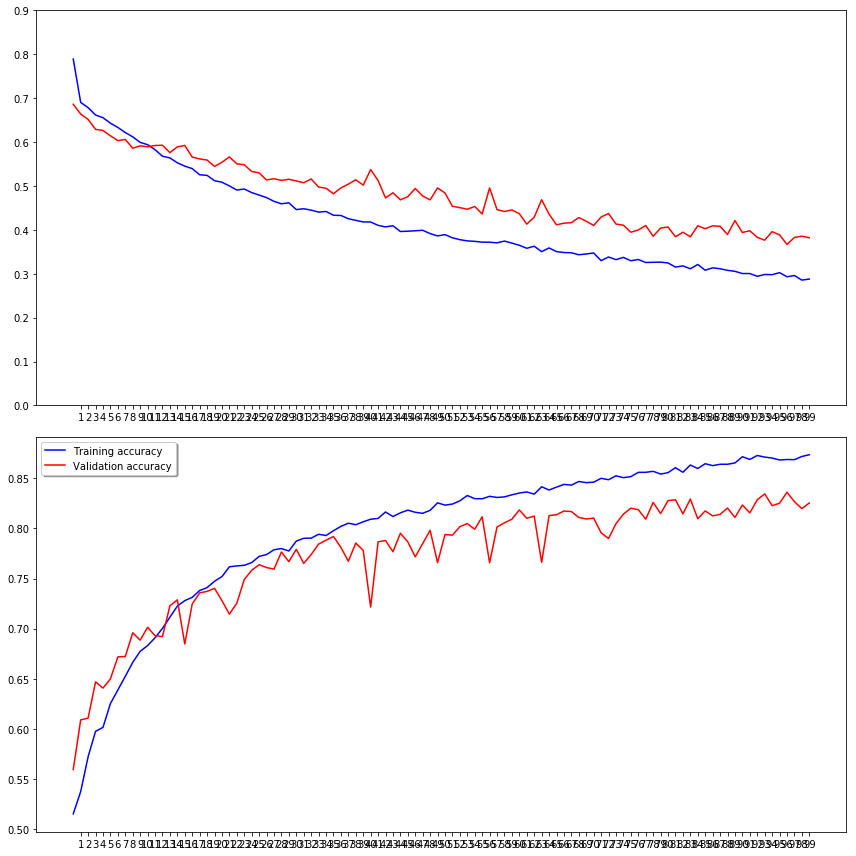

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Evaluate Model on Validation Data

In [13]:
loss, accuracy = model. evaluate_generator(valid_generator, STEP_SIZE_VALID, verbose=1)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

234/234 [==============================] - 24s 104ms/step
Test: accuracy = 0.831063  ;  loss = 0.374781 
